In [1]:
text="""다음 주 화요일에 연세대학교 대우관 별관에서 뵙겠습니다.\n
연락처를 남겨주세요\n
다른 교수님들에게 의견을 들어봐야 합니다.\n
학생들의 의견을 알아보겠습니다.\n
이메일 주소가 어떻게 되세요?\n
감사합니다.\n
잘 모르겠는데요\n
주임교수님과 상의하고 연락드리겠습니다.\n
다음 주 화요일에 연세대학교 대우관 별관에서 뵙겠습니다.\n
연락처를 남겨주세요\n
다른 교수님들에게 의견을 들어봐야 합니다.\n
학생들의 의견을 알아보겠습니다.\n
이메일 주소가 어떻게 되세요?\n
감사합니다.\n
잘 모르겠는데요\n
주임교수님과 상의하고 연락드리겠습니다.\n
다음 주 화요일에 연세대학교 대우관 별관에서 뵙겠습니다.\n
연락처를 남겨주세요\n
다른 교수님들에게 의견을 들어봐야 합니다.\n
학생들의 의견을 알아보겠습니다.\n
이메일 주소가 어떻게 되세요?\n
감사합니다.\n
잘 모르겠는데요\n
주임교수님과 상의하고 연락드리겠습니다.\n"""

In [2]:
from keras_preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts([text])
encoded = t.texts_to_sequences([text])[0]

In [3]:
vocab_size = len(t.word_index) + 1
# 케라스 토크나이저의 정수 인코딩은 인덱스가 1부터 시작하지만,
# 케라스 원-핫 인코딩에서 배열의 인덱스가 0부터 시작하기 때문에
# 배열의 크기를 실제 단어 집합의 크기보다 +1로 생성해야하므로 미리 +1 선언 
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 27


In [4]:
print(t.word_index)

{'의견을': 1, '다음': 2, '주': 3, '화요일에': 4, '연세대학교': 5, '대우관': 6, '별관에서': 7, '뵙겠습니다': 8, '연락처를': 9, '남겨주세요': 10, '다른': 11, '교수님들에게': 12, '들어봐야': 13, '합니다': 14, '학생들의': 15, '알아보겠습니다': 16, '이메일': 17, '주소가': 18, '어떻게': 19, '되세요': 20, '감사합니다': 21, '잘': 22, '모르겠는데요': 23, '주임교수님과': 24, '상의하고': 25, '연락드리겠습니다': 26}


In [5]:
sequences = list()
for line in text.split('\n'): # Wn을 기준으로 문장 토큰화
    encoded = t.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('훈련 데이터의 개수: %d' % len(sequences))

훈련 데이터의 개수: 57


In [6]:
print(sequences)

[[2, 3], [2, 3, 4], [2, 3, 4, 5], [2, 3, 4, 5, 6], [2, 3, 4, 5, 6, 7], [2, 3, 4, 5, 6, 7, 8], [9, 10], [11, 12], [11, 12, 1], [11, 12, 1, 13], [11, 12, 1, 13, 14], [15, 1], [15, 1, 16], [17, 18], [17, 18, 19], [17, 18, 19, 20], [22, 23], [24, 25], [24, 25, 26], [2, 3], [2, 3, 4], [2, 3, 4, 5], [2, 3, 4, 5, 6], [2, 3, 4, 5, 6, 7], [2, 3, 4, 5, 6, 7, 8], [9, 10], [11, 12], [11, 12, 1], [11, 12, 1, 13], [11, 12, 1, 13, 14], [15, 1], [15, 1, 16], [17, 18], [17, 18, 19], [17, 18, 19, 20], [22, 23], [24, 25], [24, 25, 26], [2, 3], [2, 3, 4], [2, 3, 4, 5], [2, 3, 4, 5, 6], [2, 3, 4, 5, 6, 7], [2, 3, 4, 5, 6, 7, 8], [9, 10], [11, 12], [11, 12, 1], [11, 12, 1, 13], [11, 12, 1, 13, 14], [15, 1], [15, 1, 16], [17, 18], [17, 18, 19], [17, 18, 19, 20], [22, 23], [24, 25], [24, 25, 26]]


In [7]:
max_len = max(len(l) for l in sequences)
max_len

7

In [8]:
from keras.preprocessing.sequence import pad_sequences
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

Using TensorFlow backend.


In [9]:
import numpy as np
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]
# 리스트의 마지막 열을 제외하고 저장한 것은 X
# 리스트의 마지막 열만 저장한 것은 y

In [10]:
print(X)

[[ 0  0  0  0  0  2]
 [ 0  0  0  0  2  3]
 [ 0  0  0  2  3  4]
 [ 0  0  2  3  4  5]
 [ 0  2  3  4  5  6]
 [ 2  3  4  5  6  7]
 [ 0  0  0  0  0  9]
 [ 0  0  0  0  0 11]
 [ 0  0  0  0 11 12]
 [ 0  0  0 11 12  1]
 [ 0  0 11 12  1 13]
 [ 0  0  0  0  0 15]
 [ 0  0  0  0 15  1]
 [ 0  0  0  0  0 17]
 [ 0  0  0  0 17 18]
 [ 0  0  0 17 18 19]
 [ 0  0  0  0  0 22]
 [ 0  0  0  0  0 24]
 [ 0  0  0  0 24 25]
 [ 0  0  0  0  0  2]
 [ 0  0  0  0  2  3]
 [ 0  0  0  2  3  4]
 [ 0  0  2  3  4  5]
 [ 0  2  3  4  5  6]
 [ 2  3  4  5  6  7]
 [ 0  0  0  0  0  9]
 [ 0  0  0  0  0 11]
 [ 0  0  0  0 11 12]
 [ 0  0  0 11 12  1]
 [ 0  0 11 12  1 13]
 [ 0  0  0  0  0 15]
 [ 0  0  0  0 15  1]
 [ 0  0  0  0  0 17]
 [ 0  0  0  0 17 18]
 [ 0  0  0 17 18 19]
 [ 0  0  0  0  0 22]
 [ 0  0  0  0  0 24]
 [ 0  0  0  0 24 25]
 [ 0  0  0  0  0  2]
 [ 0  0  0  0  2  3]
 [ 0  0  0  2  3  4]
 [ 0  0  2  3  4  5]
 [ 0  2  3  4  5  6]
 [ 2  3  4  5  6  7]
 [ 0  0  0  0  0  9]
 [ 0  0  0  0  0 11]
 [ 0  0  0  0 11 12]
 [ 0  0  0 11

In [11]:
print(y)

[ 3  4  5  6  7  8 10 12  1 13 14  1 16 18 19 20 23 25 26  3  4  5  6  7
  8 10 12  1 13 14  1 16 18 19 20 23 25 26  3  4  5  6  7  8 10 12  1 13
 14  1 16 18 19 20 23 25 26]


In [12]:
from keras.utils import to_categorical
y = to_categorical(y, num_classes=vocab_size)

In [13]:
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [14]:
from keras.layers import Embedding, Dense, SimpleRNN, Dropout, LSTM
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [25]:
MODEL_SAVE_FOLDER = './model/'
import os
if not os.path.exists(MODEL_SAVE_FOLDER):
    os.mkdir(MODEL_SAVE_FOLDER)

path = MODEL_SAVE_FOLDER + '{epoch:02d}-{accuracy:.4f}.hdf5'

# 아래 셀에 체크포인트 콜백을 정의하세요.

In [26]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath=path, monitor='val_accuracy', verbose=1, save_best_only=True)
checkpoint

# 아래 셀에 얼리스탑핑 콜백을 정의하세요.

In [27]:
from keras.callbacks import EarlyStopping
## 얼리스탑핑 콜백을 정의하세요.
early_stopping = EarlyStopping(monitor='loss', min_delta=0.01, patience=10)
early_stopping

In [28]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len-1)) 

# 여기부터 코드를 수정해서 레이어를 정의하고 학습시키세요

model.add(LSTM(128 ,activation='tanh', recurrent_activation='sigmoid')) # 3
model.add(Dense(vocab_size, activation='softmax')) # 4

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # 5

hist = model.fit(X, y, validation_split=0.5, epochs=2000,verbose=2, callbacks=[checkpoint,early_stopping]) # 6

Train on 28 samples, validate on 29 samples
Epoch 1/2000
 - 0s - loss: 3.2966 - accuracy: 0.0000e+00 - val_loss: 3.2896 - val_accuracy: 0.1034

Epoch 00001: val_accuracy improved from -inf to 0.10345, saving model to ./model/01-0.0000.hdf5
Epoch 2/2000
 - 0s - loss: 3.2889 - accuracy: 0.1071 - val_loss: 3.2844 - val_accuracy: 0.1379

Epoch 00002: val_accuracy improved from 0.10345 to 0.13793, saving model to ./model/02-0.1071.hdf5
Epoch 3/2000
 - 0s - loss: 3.2811 - accuracy: 0.1786 - val_loss: 3.2794 - val_accuracy: 0.1379

Epoch 00003: val_accuracy did not improve from 0.13793
Epoch 4/2000
 - 0s - loss: 3.2737 - accuracy: 0.1786 - val_loss: 3.2739 - val_accuracy: 0.1034

Epoch 00004: val_accuracy did not improve from 0.13793
Epoch 5/2000
 - 0s - loss: 3.2657 - accuracy: 0.1071 - val_loss: 3.2676 - val_accuracy: 0.1034

Epoch 00005: val_accuracy did not improve from 0.13793
Epoch 6/2000
 - 0s - loss: 3.2565 - accuracy: 0.1071 - val_loss: 3.2609 - val_accuracy: 0.1034

Epoch 00006: val


Epoch 00053: val_accuracy did not improve from 0.34483
Epoch 54/2000
 - 0s - loss: 1.6465 - accuracy: 0.5357 - val_loss: 2.0265 - val_accuracy: 0.3103

Epoch 00054: val_accuracy did not improve from 0.34483
Epoch 55/2000
 - 0s - loss: 1.6103 - accuracy: 0.5357 - val_loss: 1.9912 - val_accuracy: 0.3103

Epoch 00055: val_accuracy did not improve from 0.34483
Epoch 56/2000
 - 0s - loss: 1.5736 - accuracy: 0.5357 - val_loss: 1.9534 - val_accuracy: 0.4483

Epoch 00056: val_accuracy improved from 0.34483 to 0.44828, saving model to ./model/56-0.5357.hdf5
Epoch 57/2000
 - 0s - loss: 1.5381 - accuracy: 0.7143 - val_loss: 1.9104 - val_accuracy: 0.4138

Epoch 00057: val_accuracy did not improve from 0.44828
Epoch 58/2000
 - 0s - loss: 1.5019 - accuracy: 0.6429 - val_loss: 1.8633 - val_accuracy: 0.4138

Epoch 00058: val_accuracy did not improve from 0.44828
Epoch 59/2000
 - 0s - loss: 1.4668 - accuracy: 0.6429 - val_loss: 1.8159 - val_accuracy: 0.5172

Epoch 00059: val_accuracy improved from 0.4


Epoch 00105: val_accuracy improved from 0.86207 to 0.93103, saving model to ./model/105-0.9286.hdf5
Epoch 106/2000
 - 0s - loss: 0.4708 - accuracy: 0.9643 - val_loss: 0.6353 - val_accuracy: 0.9310

Epoch 00106: val_accuracy did not improve from 0.93103
Epoch 107/2000
 - 0s - loss: 0.4590 - accuracy: 0.9643 - val_loss: 0.6217 - val_accuracy: 0.9310

Epoch 00107: val_accuracy did not improve from 0.93103
Epoch 108/2000
 - 0s - loss: 0.4468 - accuracy: 0.9643 - val_loss: 0.6040 - val_accuracy: 0.9310

Epoch 00108: val_accuracy did not improve from 0.93103
Epoch 109/2000
 - 0s - loss: 0.4345 - accuracy: 0.9643 - val_loss: 0.5891 - val_accuracy: 1.0000

Epoch 00109: val_accuracy improved from 0.93103 to 1.00000, saving model to ./model/109-0.9643.hdf5
Epoch 110/2000
 - 0s - loss: 0.4233 - accuracy: 1.0000 - val_loss: 0.5772 - val_accuracy: 0.9310

Epoch 00110: val_accuracy did not improve from 1.00000
Epoch 111/2000
 - 0s - loss: 0.4125 - accuracy: 0.9643 - val_loss: 0.5603 - val_accuracy:


Epoch 00158: val_accuracy did not improve from 1.00000
Epoch 159/2000
 - 0s - loss: 0.0970 - accuracy: 1.0000 - val_loss: 0.1293 - val_accuracy: 1.0000

Epoch 00159: val_accuracy did not improve from 1.00000
Epoch 160/2000
 - 0s - loss: 0.0942 - accuracy: 1.0000 - val_loss: 0.1255 - val_accuracy: 1.0000

Epoch 00160: val_accuracy did not improve from 1.00000
Epoch 161/2000
 - 0s - loss: 0.0915 - accuracy: 1.0000 - val_loss: 0.1217 - val_accuracy: 1.0000

Epoch 00161: val_accuracy did not improve from 1.00000
Epoch 162/2000
 - 0s - loss: 0.0889 - accuracy: 1.0000 - val_loss: 0.1181 - val_accuracy: 1.0000

Epoch 00162: val_accuracy did not improve from 1.00000
Epoch 163/2000
 - 0s - loss: 0.0865 - accuracy: 1.0000 - val_loss: 0.1147 - val_accuracy: 1.0000

Epoch 00163: val_accuracy did not improve from 1.00000
Epoch 164/2000
 - 0s - loss: 0.0841 - accuracy: 1.0000 - val_loss: 0.1114 - val_accuracy: 1.0000

Epoch 00164: val_accuracy did not improve from 1.00000
Epoch 165/2000
 - 0s - los

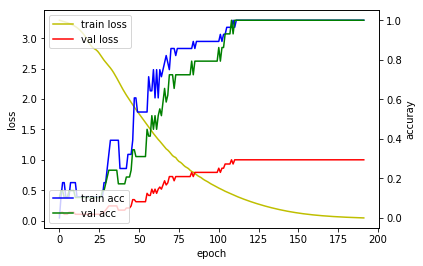

In [31]:
# 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_accuracy'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [32]:
def sentence_generation(model, t, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
    sentence = ''
    for _ in range(n): # n번 반복
        encoded = t.texts_to_sequences([current_word])[0] # 현재 단어에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') # 데이터에 대한 패딩
        result = model.predict_classes(encoded, verbose=0)
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        for word, index in t.word_index.items(): 
            if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
                break # 해당 단어가 예측 단어이므로 break
        current_word = current_word + ' '  + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        sentence = sentence + ' ' + word # 예측 단어를 문장에 저장
    # for문이므로 이 행동을 다시 반복
    sentence = init_word + sentence
    return sentence

In [33]:
print(sentence_generation(model, t, '주임교수님', 2))

주임교수님 교수님들에게 의견을


In [34]:
print(sentence_generation(model, t, '대우관', 2))

대우관 주 화요일에


In [35]:
print(sentence_generation(model, t, '의견', 2))

의견 교수님들에게 의견을
